## Spotify Churn Prediction - Exploratory Data Analysis (EDA)

This notebook explores the cleaned dataset to understand user behavior, identify churn patterns, and prepare for modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_spotify_churn.csv')

#### 1. Dataset Overview

In [2]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (9286, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286 entries, 0 to 9285
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_Id                     9286 non-null   int64  
 1   Age                         9286 non-null   float64
 2   Country                     9286 non-null   object 
 3   Device                      9286 non-null   object 
 4   Subscription_Plan           9286 non-null   object 
 5   Subscription_Length_Months  9286 non-null   float64
 6   Auto_Renewal                9286 non-null   int64  
 7   Monthly_Active_Days         9286 non-null   float64
 8   Avg_Session_Duration_Min    9286 non-null   float64
 9   Num_Songs_Streamed          9286 non-null   float64
 10  Payment_Method              9286 non-null   object 
 11  Num_Failed_Payments         9286 non-null   int64  
 12  Discount_Used               9286 non-null   int64  
 13  Churn          

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
count,9286.000000,9286.000000,9286,9286,9286,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000,9286,9286.000000,9286.000000,9286
unique,NaN,NaN,6,4,5,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,2
top,NaN,NaN,United States,iOS,Premium,NaN,NaN,NaN,NaN,NaN,Credit Card,NaN,NaN,No
freq,NaN,NaN,3056,3928,3156,NaN,NaN,NaN,NaN,NaN,1610,NaN,NaN,5355
mean,4992.329744,40.725716,NaN,NaN,NaN,29.739177,0.668103,14.479970,62.910694,502.304975,NaN,1.390157,0.593797,NaN
std,2885.322970,13.617960,NaN,NaN,NaN,16.967200,0.470920,8.618584,33.242565,287.434165,NaN,0.803296,0.491150,NaN
min,1.000000,18.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,5.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2483.250000,29.000000,NaN,NaN,NaN,15.000000,0.000000,7.000000,33.300000,251.000000,NaN,1.000000,0.000000,NaN
50%,4987.500000,40.000000,NaN,NaN,NaN,29.000000,1.000000,14.000000,63.500000,504.000000,NaN,2.000000,1.000000,NaN
75%,7492.750000,52.000000,NaN,NaN,NaN,45.000000,1.000000,22.000000,91.400000,755.000000,NaN,2.000000,1.000000,NaN


#### 2. Churn Distribution

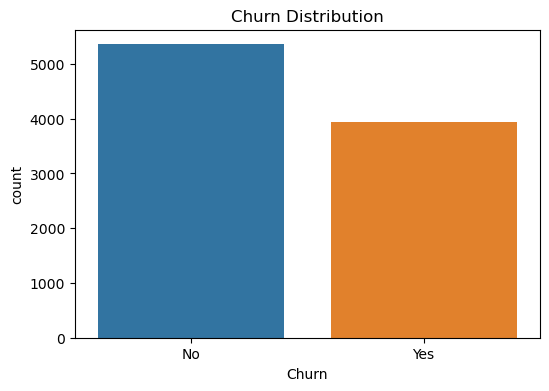

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

#### 3. Churn by Subscription Plan

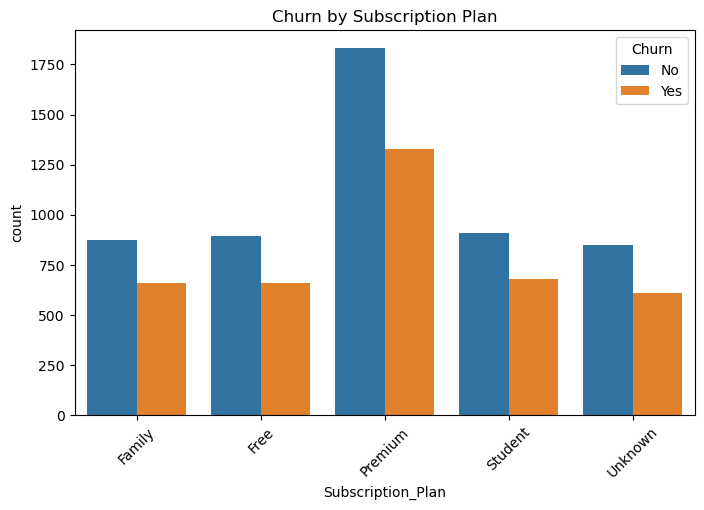

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='Subscription_Plan', hue='Churn', data=df)
plt.title("Churn by Subscription Plan")
plt.xticks(rotation=45)
plt.show()

#### 4. Churn by Country (Top 10)

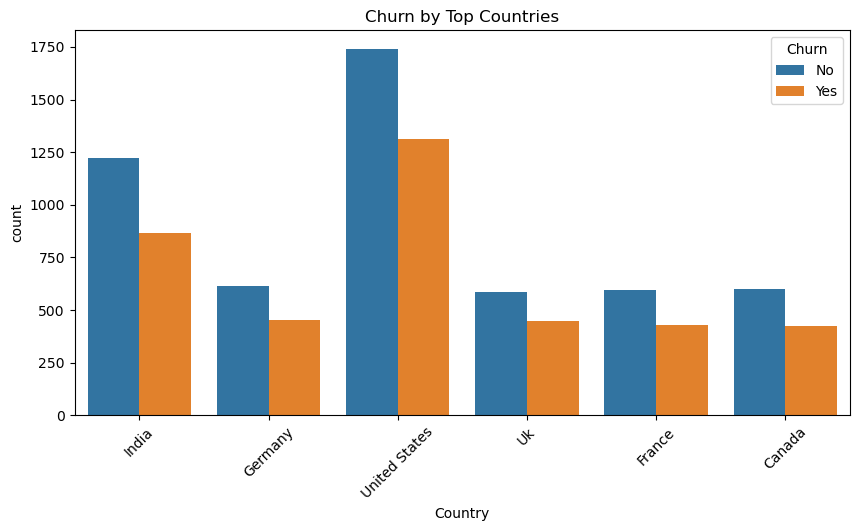

In [5]:
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(x='Country', hue='Churn', data=df[df['Country'].isin(top_countries)])
plt.title("Churn by Top Countries")
plt.xticks(rotation=45)
plt.show()

#### 5. Churn by Device

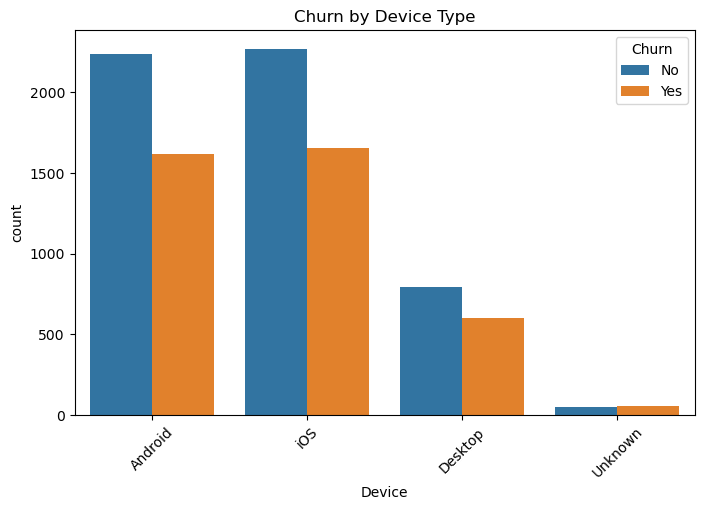

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Device', hue='Churn', data=df)
plt.title("Churn by Device Type")
plt.xticks(rotation=45)
plt.show()

#### 6. Numeric Features by Churn

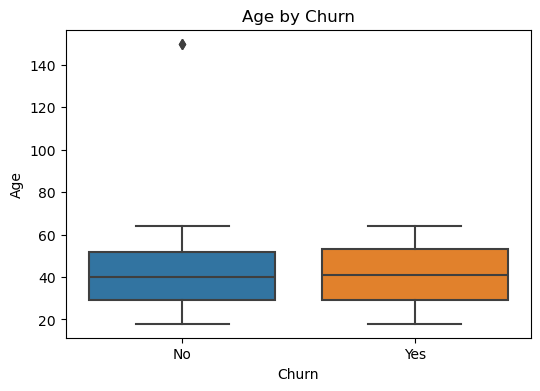

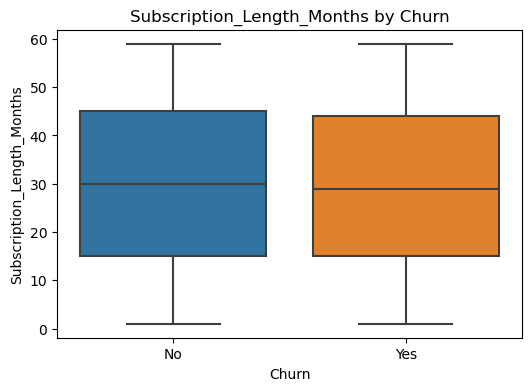

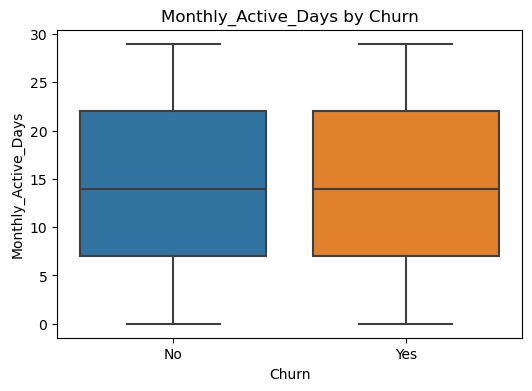

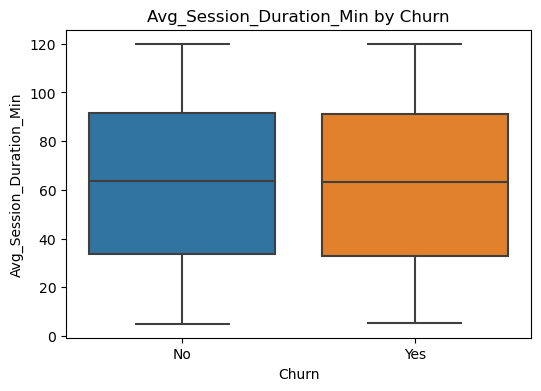

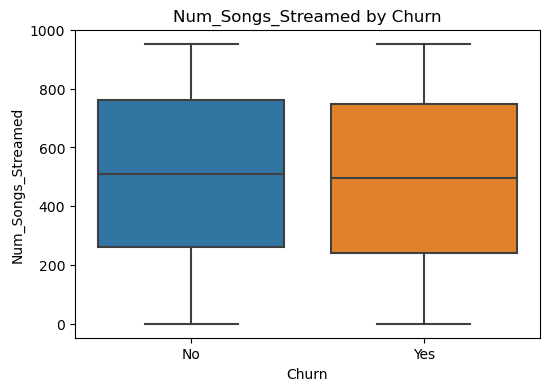

In [7]:
numeric_features = ['Age', 'Subscription_Length_Months', 'Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f"{feature} by Churn")
    plt.show()

#### 7. Correlation Heatmap (Numerical Features)

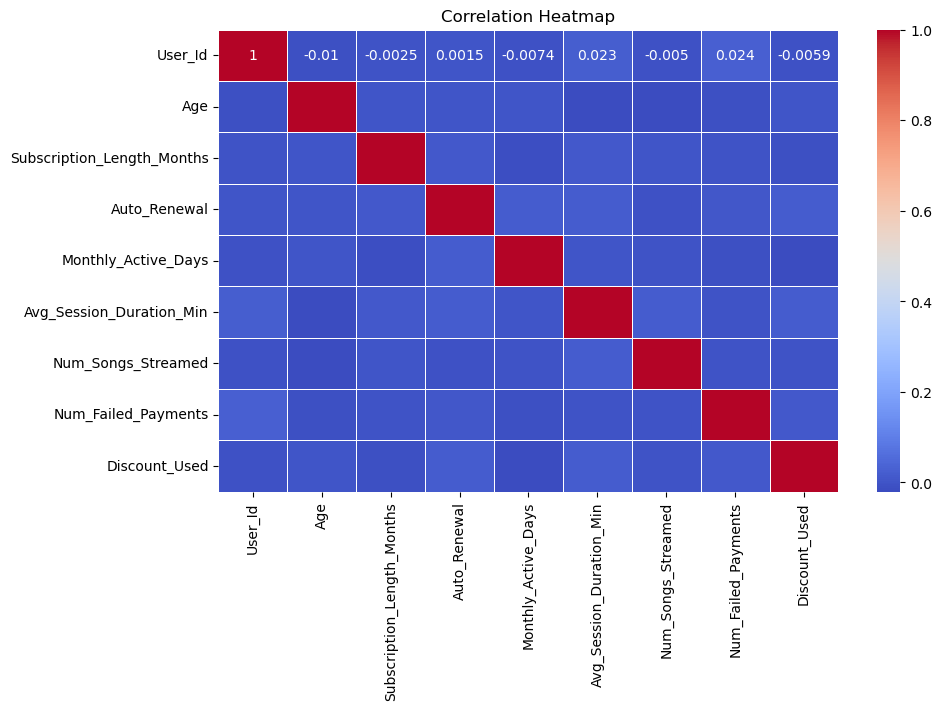

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### 8. Pairplot (Selected Features by Churn)

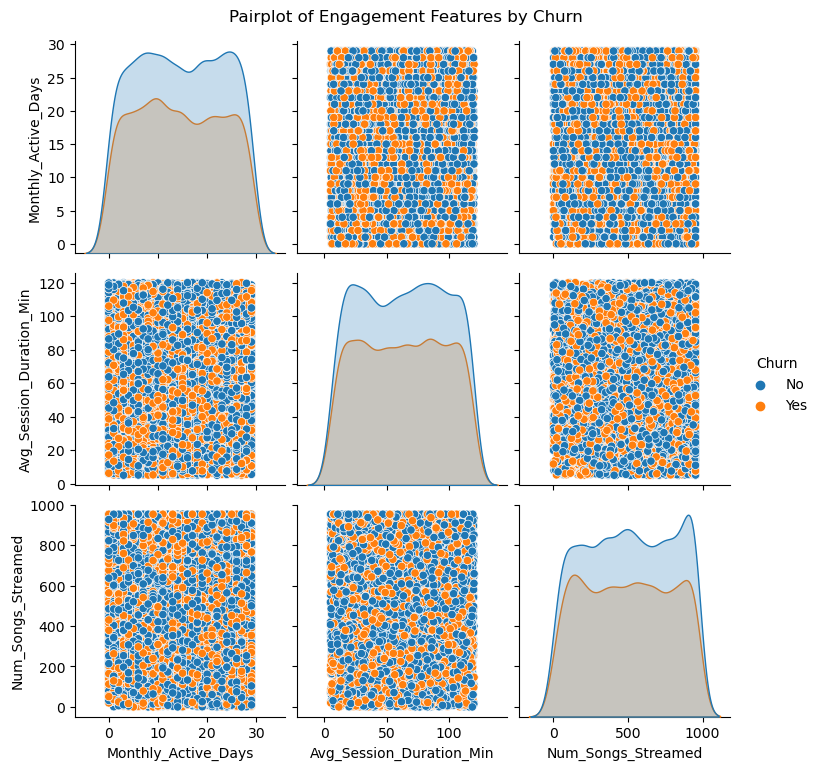

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(df, vars=['Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed'], hue='Churn')
plt.suptitle("Pairplot of Engagement Features by Churn", y=1.02)
plt.show()

#### 9. Churn Rate (%) by Subscription Plan

In [11]:
churn_rate_by_plan = df.groupby('Subscription_Plan')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_percent = (churn_rate_by_plan * 100).round(2)
print("Churn Rate (%) by Subscription Plan:")
print(churn_rate_percent)

Churn Rate (%) by Subscription Plan:
Churn                 No    Yes
Subscription_Plan              
Family             57.05  42.95
Free               57.51  42.49
Premium            57.98  42.02
Student            57.30  42.70
Unknown            58.19  41.81


### Spotify Churn Prediction – EDA Summary

#### 1. Dataset Overview
- Reviewed data shape, structure, and summary statistics.
- Checked for missing values and confirmed data types.
- Verified data after cleaning steps like standardizing text and removing duplicates.

#### 2. Churn Distribution
- Observed class imbalance: more users are retained (`No`) than churned (`Yes`).
- Imbalance will need to be considered during modeling.

#### 3. Churn by Subscription Plan
- **Lower churn** observed for users on `Premium` and `Family` plans.
- **Higher churn** for users on `Free` and `Student` plans.
- Indicates stronger retention with longer-term or bundled plans.

#### 4. Churn by Country (Top 10)
- Country-wise churn patterns vary.
- Some regions (e.g., `India`, `USA`) have slightly higher churn.
- Geographical segmentation could improve personalization strategies

#### 5. Churn by Device
- After cleaning device names (e.g., `'android'`, `'Android'` → `'Android'`), device-specific churn patterns are clearer.
- Churn is somewhat higher on **Desktop** and **Android** vs **iOS**.
- Device experience may impact user satisfaction and retention.

#### 6. Numeric Features by Churn (Boxplots)
- **Age**: Slight trend showing lower churn in older users.
- **Subscription_Length_Months**: Longer subscriptions are linked with lower churn.
- **Monthly_Active_Days**, **Avg_Session_Duration_Min**, and **Num_Songs_Streamed**:
  - Strong patterns — churned users are generally less active and engaged.

#### 7. Correlation Heatmap
- Strong positive correlation between:
  - `Monthly_Active_Days` and `Num_Songs_Streamed`
  - `Avg_Session_Duration_Min` and `Num_Songs_Streamed`
- Indicates redundancy among some engagement metrics.

#### 8. Pairplot of Engagement Features
- Clear clustering: churned users tend to have **lower session time**, **lower activity**, and **lower streaming volume**.
- Non-churned users are more spread out, showing higher engagement.

#### 9. Churn Rate by Subscription Plan
- Calculated actual churn percentage by plan type.
- **Family** and **Premium** plans had the lowest churn percentages.
- **Free** and **Student** plans had higher relative churn rates.
- Confirms that plan type is a key factor in retention.

### Overall Insight:
Churn is heavily influenced by **user engagement** (activity, duration, streams) and **subscription plan type**. These variables are crucial for building a predictive model and informing product strategy.

